# 다중 회귀
- 다중의 독립 변수가 존재하는 회귀 분석
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 예측
- 다중 회귀에서 최적의 모델을 결정하기 위해 여러 가지의 방법이 존재
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있기 때문에 이를 방지하기 위해 다양한 규제 방식 존재하고 규제에 따른 모델들이 존재
    - 모델에서 규제 방식에 따라서 가중치를 제한
    - 독립 변수에서의 가중치가 0이 되는 차원(컬럼 | 피쳐)들이 생성
    - 규제를 강하게 걸면 가중치의 절대치가 줄어들고 0에 가까워진다.

## 릿지
 - 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한 것
 
 - 매개변수
    - alpha
        - 기본값: 1.0
        - 규제의 강도 -> 클수록 회귀 계수가 작아지고 과적합의 방지, 과소적합 위험
        - 릿지의 중요한 매개변수
    - solver
        - 기본값: 'auto'
        - 해를 구하는 방법
        - 데이터의 크기 / 희소성에 따라 적합한 solver를 선택
        - 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'
            - svd: 특이값 분해, 다중공선성 있고 데이터의 개수가 작거나 중간 정도
            - cholesky: 정규방정식, 데이터의 개수가 작거나 중간 정도
            - lsqr: 반복 최고제곱, 대규모 데이터 중 희소/밀집 데이터
            - sparse_cg: 공액 기울기법, 대규모 데이터 중 희소 데이터
            - sag: 확률적 평균 검사, 데이터의 행의 수가 열의 수보다 월등히 많은 경우
            - saga: sag 확장, 대규모 희소, ElasticNet 가능
    - tol
        - 기본값: 0.001(1e-03)
        - 수렴의 판단 기준, 작을수록 정밀, 속도적인 면에서 느려질 수 있다.
    - max_iter
        - 기본값: None
        - 최적화 될 때까지 최대 반복 횟수. (데이터 크거나 수치가 불안정한 경우에 필요)

- 속성
    - coef_
        - 회기계수를 출력 (규제로 인해서 선형 회귀에 비해 값들이 작게 출력)
    - n_iter
        - solver가 반복한 횟수 출력

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()

In [6]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [9]:
# alpha 값에 따라 회귀계수가 어떻게 변화하는가?
# 반복 실행할 때마다 회귀계수를 추가해주는 빈 리스트
data = []

for a in alpha:
    # print(a)
    # Ridge class 생성시 alpha 매개변수에 a를 대입
    ridge = Ridge(alpha = a)
    ridge.fit(df.values, diabetes['target'])
    data.append(ridge.coef_)
data

[array([  -9.54916175, -239.08695779,  520.3693746 ,  323.82274522,
        -712.32215918,  413.37912498,   65.81132269,  167.51300694,
         720.9399241 ,   68.12336029]),
 array([  -7.19753448, -234.54976419,  520.58860098,  320.51713055,
        -380.6071353 ,  150.48467052,  -78.58927534,  130.31252148,
         592.34795865,   71.13484405]),
 array([   1.30870543, -207.19241786,  489.69517109,  301.76405786,
         -83.46603399,  -70.8268319 , -188.67889782,  115.7121356 ,
         443.81291747,   86.7493154 ]),
 array([  29.46611189,  -83.15427636,  306.35268015,  201.62773437,
           5.90961437,  -29.51549508, -152.04028006,  117.3117316 ,
         262.94429001,  111.87895644]),
 array([ 19.81284181,  -0.91842974,  75.41621398,  55.02515953,
         19.92462111,  13.94871542, -47.5538158 ,  48.2594332 ,
         70.14394833,  44.21389238])]

In [13]:
df_ridge = pd.DataFrame(data, index = alpha, columns = df.columns)

TypeError: axline() missing 1 required positional argument: 'xy1'

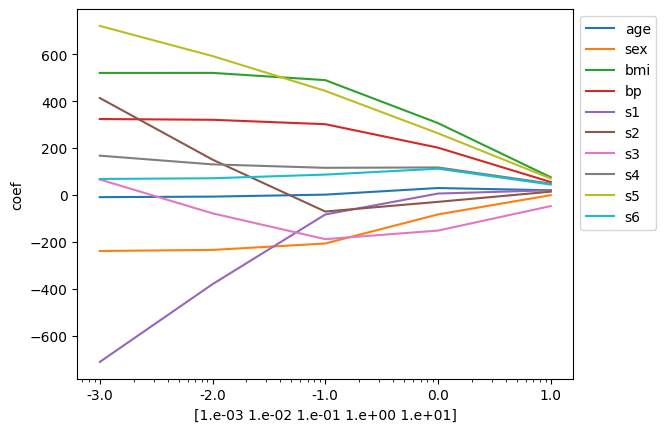

In [18]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ridge.columns, bbox_to_anchor = (1, 1))
plt.xlabel(alpha)
plt.ylabel('coef')
plt.axline(y=0, color= 'black', linewidth = 3)

plt.show()

In [19]:
# 단순선형회귀와 릿지회귀의 회귀 계수를 확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    df.values, 
    diabetes['target']
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


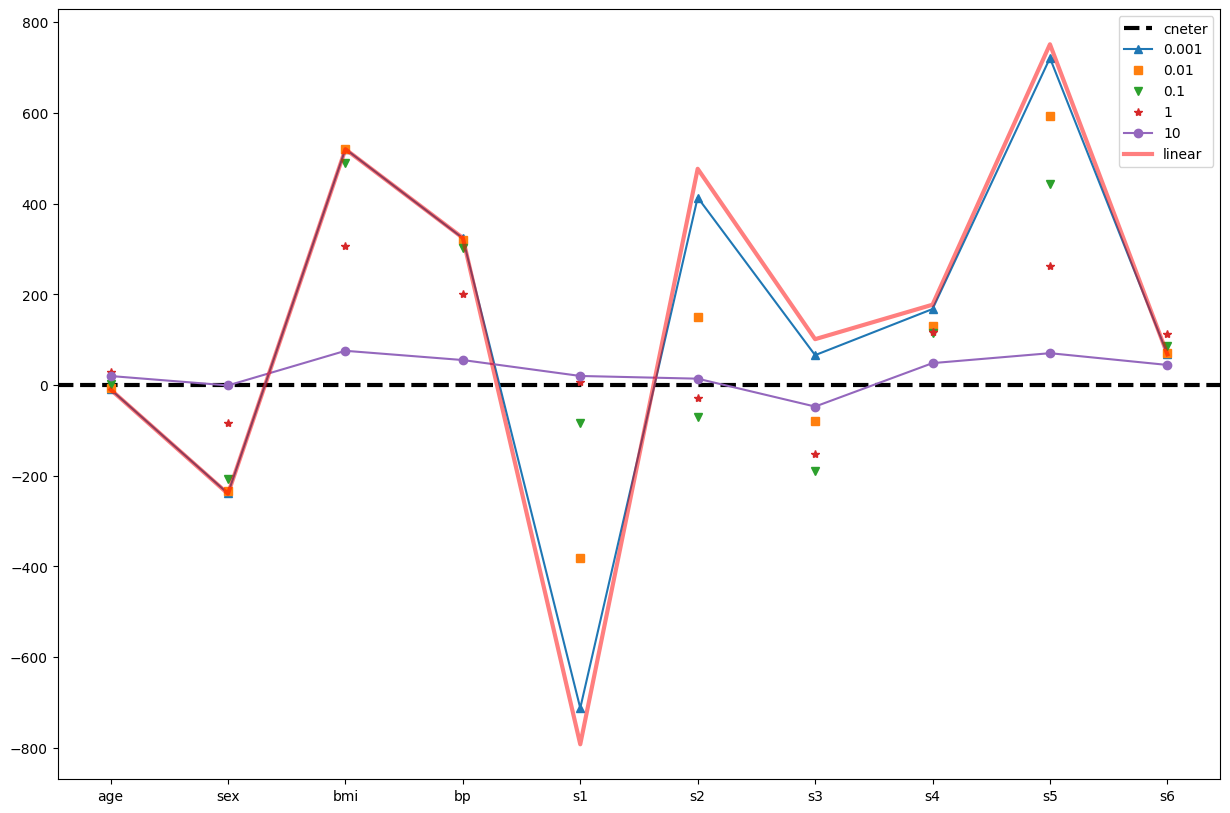

In [27]:
plt.figure(figsize=(15, 10))
plt.axhline(y=0, linestyle = '--', linewidth = 3, color = 'black')
plt.plot(df_ridge.loc[0.001, ], '^-')
plt.plot(df_ridge.loc[0.01,], 's')
plt.plot(df_ridge.loc[0.1], 'v')
plt.plot(df_ridge.loc[1.0], '*')
plt.plot(df_ridge.loc[10.0], 'o-')
plt.plot(lr.coef_, 'r', linewidth = 3, alpha = 0.5)
plt.legend(['cneter', 0.001, 0.01, 0.1, 1, 10, 'linear'], bbox_to_anchor = (1,1))

plt.show()

- 연습
    - train과 test의 비율은 8:2로 분할
    - 당뇨 데이터를 이용하여 단순 선형 회귀를 이용하여 학습, 평가를 하여 평가지표 mse 값을 확인하고
    - 릿지 회귀를 이용하여 alpha 0.01, 0.1, 1인 경우로 학습, 평가를 하여 평가지표 mse값을 확인하여 비교

In [28]:
diabetes = load_diabetes()

In [90]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [36]:
dia_df = pd.DataFrame(diabetes['data'])
dia_df.columns = diabetes['feature_names']
dia_df['target'] = diabetes['target']

In [91]:
dia_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [32]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(
    dia_df.drop(['target'], axis = 1),
    dia_df['target'],
    test_size = 0.2,
    # random_state = 42
)

In [51]:
# Y_train.mean()
Y_test.mean()

np.float64(153.7191011235955)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
lr_pred = lr.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
lr_mse = mean_squared_error(lr_pred, Y_test)
lr_r2 = r2_score(lr_pred, Y_test)

In [88]:
alpha = np.logspace(-2, 0, 3)
alpha

array([0.01, 0.1 , 1.  ])

In [108]:
alpha = np.logspace(-2, 0, 3)
pred_list = []
for a in alpha:
    rd = Ridge(alpha = a)
    rd.fit(X_train, Y_train)
    pred = rd.predict(X_test)
    pred_list.append(pred)
pred_list

[array([262.79028696, 109.94916577,  92.40433155, 155.42415181,
         59.74344439, 224.78763972,  62.78582256,  85.83806213,
        126.84646118, 119.28706078,  50.28371179, 107.20176694,
        175.75748521, 121.24771404, 121.48518008, 137.93807427,
        110.75774389, 133.93869243, 162.90915203, 179.04911849,
        160.40173137, 152.79921225, 170.86491171, 157.54106059,
        178.1473266 ,  64.48544827, 134.4608726 , 255.27415844,
        139.97437085,  83.33149617, 194.97271513, 193.26018025,
        189.78148811,  64.70194444,  80.51340453, 231.00915729,
         68.91743973, 155.76150274, 174.89366649, 105.5000876 ,
        172.69888779, 220.92707983,  43.80729627, 137.90889638,
        145.46213878, 116.00956855,  89.17792577,  95.32454496,
        143.67675415, 218.70855364, 176.70328964, 106.26310694,
         74.96398526,  77.91880152, 181.89438946, 138.29166552,
        158.66316906,  58.59174285, 133.64744765, 135.24599119,
         73.99816648, 135.5993961 , 187.

In [118]:
mse1 = mean_squared_error(pred_list[0], Y_test) 
mse2= mean_squared_error(pred_list[1], Y_test)
mse3 = mean_squared_error(pred_list[2], Y_test)
r2_1 = r2_score(pred_list[0], Y_test) 
r2_2= r2_score(pred_list[1], Y_test)
r2_3 = r2_score(pred_list[2], Y_test)

In [119]:
print("MSE")
print("Linear Regression : ", lr_mse)
print("Ridge, alpha = 0.01, : ", mse1)
print("Ridge, alpha = 0.1 : ", mse2)
print("Ridge, alpha = 1 : ", mse3)
print("r2")
print("Linear Regression : ",lr_r2)
print("Ridge, alpha = 0.01, : ", r2_1)
print("Ridge, alpha = 0.1 : ", r2_2)
print("Ridge, alpha = 1 : ", r2_3)

MSE
Linear Regression :  2930.496898811339
Ridge, alpha = 0.01, :  2615.7014381864133
Ridge, alpha = 0.1 :  2623.4342747884775
Ridge, alpha = 1 :  2930.496898811339
r2
Linear Regression :  -1.2073152967975505
Ridge, alpha = 0.01, :  0.10375201792904765
Ridge, alpha = 0.1 :  -0.005981981947454251
Ridge, alpha = 1 :  -1.2073152967975505


In [106]:
# X_test의 첫번째 인덱스의 값
X_test_0 = X_test.iloc[0, ]
print(X_test_0)
# 선형 회귀 계수
print(lr.coef_)
# 절편
print(lr.intercept_)

age    0.009016
sex    0.050680
bmi    0.069241
bp     0.059744
s1     0.017694
s2    -0.023234
s3    -0.047082
s4     0.034309
s5     0.103297
s6     0.073480
Name: 390, dtype: float64
[ -21.3093004  -169.83787633  525.50957586  334.86073665 -862.95665383
  506.44409668  141.90422211  195.8300695   780.35225413   79.62847121]
149.59257002957546


In [107]:
# 첫 번째 행의 데이터 선형회귀 예측값 계산
pred_1 = lr.intercept_
for w , x in zip(lr.coef_, X_test_0):
    pred_1 = pred_1 + w * x

pred_1

np.float64(256.6459771338989)

In [116]:
# 선형 회귀 첫 번째 예측 값
lr_pred[0]

np.float64(256.6459771338989)

## 라쏘
- 최소 제곱 적합식의 수축 패널티에 L1 패널티를 추가한 것
- 릿지 회귀는 변수의 크기가 매우 큰 데이터인 경우에 결과를 해석하기 어려움 -> 이를 해결하기 위한 방법

- 매개변수
    - alpha
        - 기본값 : 1.0
        - 규제 강도 : 클수록 많은 회귀 계수가 0이 되어 변수 선택 (feature select)
        - 규제의 강도가 너무 큰 경우에는 많은 컬럼의 회귀 계수가 0이 되어 단순한 데이터(과소적합)
    - selection
        - 기본값: 'cyclic'
        - 좌표축 경사법 업데이트의 순서
            - cyclic : 순차적으로 업데이트
            - random : 무작위 선택 업데이트
        - 피쳐의 순서대로 가중치를 적용할 것인가? 아니면 무작위 선택으로 가중치를 적용할 것인가?
    - percompute
        - 기본값 : auto
        - Gamma matrix의 미리 계산의 여부
        - 그람 행렬은 선형 대수에서 자주 쓰이는 개념
        - 회귀 분석에서 핵심적인 부분
    - warm_start
        - 기본값 : False
        - 이전의 학습 결과를 이어서 학습을 할지 지정
        

In [120]:
from sklearn.linear_model import Lasso

In [123]:
# alpha의 범위를 하나 지정
alpha = np.logspace(-3, 1, 5)
# 모델이 학습을 하고 생성된 회귀 계수를 추가하는 빈 리스트 생성
data = []
for a in alpha:
    lasso = Lasso(alpha = a)
    lasso.fit(df.values, diabetes['target'])
    data.append(lasso.coef_)

lasso_df = pd.DataFrame(data, index=alpha, columns = df.columns)
lasso_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


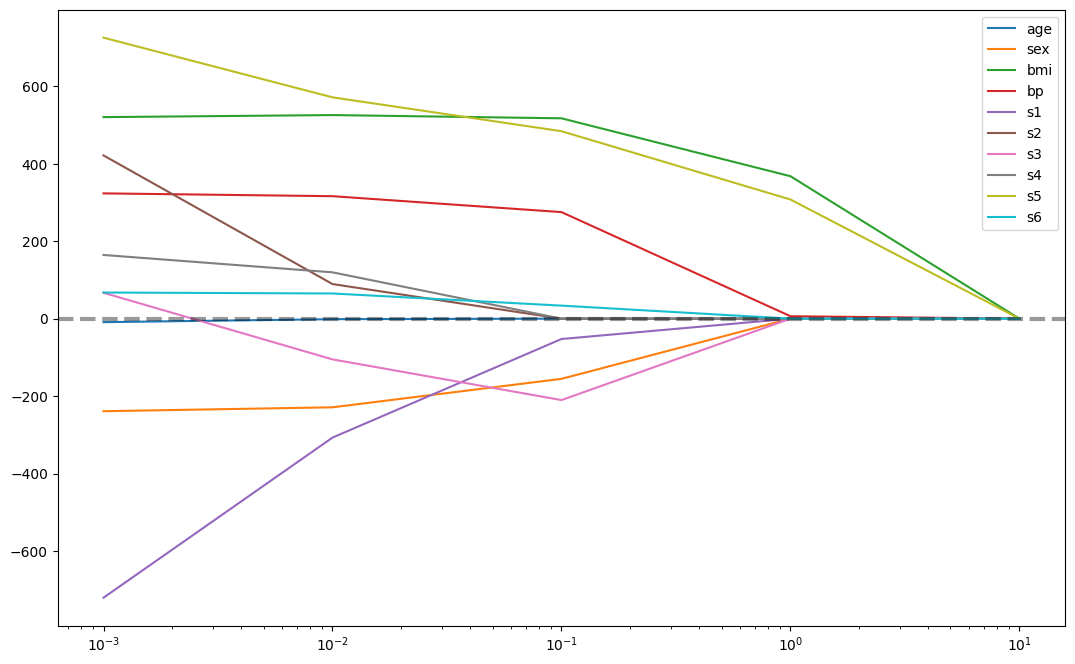

In [127]:
# 회귀계수를 그래프 시각화
plt.figure(figsize = (13,8))
plt.semilogx(lasso_df)

# y = 0 보조선 추가
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3, alpha = 0.4)
# legend 추가
plt.legend(labels = lasso_df.columns)

plt.show()

In [128]:
lr = LinearRegression()

In [129]:
lr.fit(df.values, diabetes['target'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


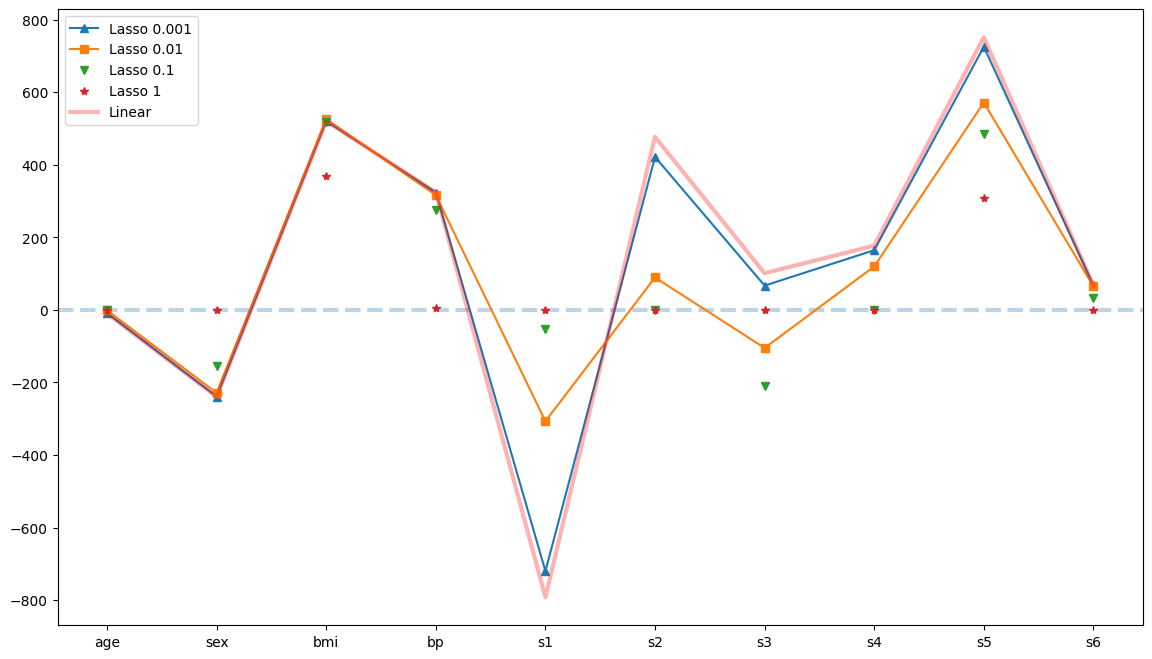

In [136]:
plt.figure(figsize = (14, 8))
plt.axhline(y = 0, linestyle = "--", linewidth = 3, alpha = 0.3)
plt.plot(lasso_df.loc[0.001, ], '^-', label = 'Lasso 0.001')
plt.plot(lasso_df.loc[0.01, ], 's-', label = 'Lasso 0.01')
plt.plot(lasso_df.loc[0.1, ], 'v', label = 'Lasso 0.1')
plt.plot(lasso_df.loc[1, ], '*', label = 'Lasso 1')
# plt.plot(lasso_df.loc[10, ], 'o-', label = 'Lasso 10')
plt.plot(lr.coef_, 'r', linewidth = 3, alpha = 0.3, label = 'Linear')

plt.legend()
plt.show()

- 연습
    - train, test 75:25 비율로 생성
    - 단순 선형 회귀, Lasso 모델을 이용하여 당뇨병 데이터 학습을 시키고 평가를 하여 평가 지료를 하나 생성
        - Lasso의 Alpha는 0.01, 0.1 2개의 모델을 생성
    - mse, r2_score의 값들을 비교

In [144]:
df.values

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.values, diabetes['target'],
    test_size=0.25,
    random_state=42
)

In [175]:
alpha = np.logspace(-2, 1, 3)
predlist = []
for a in alpha:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, Y_train)
    pred = lasso.predict(X_test)
    predlist.append(pred)

predlist

[array([138.22016818, 182.6430268 , 134.3986971 , 292.97424465,
        123.73238755,  90.72623283, 255.90650425, 181.67285059,
         85.16262163, 110.12043271,  94.17732498, 167.24448594,
         62.18914607, 206.03476609,  99.3337002 , 132.93417565,
        217.40849871, 249.40828798, 201.04632988, 218.0280665 ,
        204.59699084,  88.98935748,  70.12659135, 189.53622064,
        154.94786946, 164.99884415, 193.43738315, 184.39684303,
         48.51799529, 110.29589024, 177.62780921,  90.85641701,
        130.07144895, 183.94662124, 171.25747818, 190.24726535,
        123.02408999, 118.29253046, 145.8170866 ,  60.81841894,
         72.58617242, 109.81927635, 168.52993173, 152.57935591,
        171.14828612,  64.7141553 ,  75.28555295, 108.11183373,
         58.19163683, 162.76926921, 155.31449076,  65.62178265,
        115.71470311, 107.93320956, 176.22231706, 160.06141225,
         93.29957715, 211.21017811, 118.38069438,  67.25867971,
        184.71050019, 203.31241568, 141.

In [176]:
for i in range(len(alpha)):
    print(f"lasso, alpha = {alpha[i]}:, mse: ", mean_squared_error(predlist[i], Y_test))
    print(f"lasso, alpha = {alpha[i]}, r2: ", r2_score(predlist[i], Y_test))

# print("lasso, alpha = 0.01, mse: ", mean_squared_error(predlist[0], Y_test))
# print("lasso, alpha = 0.1, mse: ", mean_squared_error(predlist[1], Y_test))
# print("lasso, alpha = 1, mse: ", mean_squared_error(predlist[2], Y_test))
# print("lasso, alpha = 0.01, r2: ", r2_score(predlist[0], Y_test))
# print("lasso, alpha = 0.1, r2: ", r2_score(predlist[1], Y_test))
# print("lasso, alpha = 1, r2: ", r2_score(predlist[2], Y_test))

lasso, alpha = 0.01:, mse:  2831.000208176871
lasso, alpha = 0.01, r2:  0.07540104304235073
lasso, alpha = 0.31622776601683794:, mse:  2826.0056198055913
lasso, alpha = 0.31622776601683794, r2:  -0.2929949814467323
lasso, alpha = 10.0:, mse:  5607.197930791938
lasso, alpha = 10.0, r2:  0.0


In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)
pred_lr

In [171]:
print("lr, mse: ", round(mean_squared_error(pred_lr, Y_test), 4))
print("lr, r2: ", round(r2_score(pred_lr, Y_test), 4))

lr, mse:  2848.3107
lr, r2:  0.0962


## 엘라스틱넷
- 릿지회귀, 라쏘회귀를 절출한 알고리즘
- L1, L2 패널티를 혼합 -> 혼합의 비율을 지정

- 매개변수
    - alpha
        - 기본값 : 1
        - 전체 규제의 강도
    - l1_ratio
        - 기본값: 0.5
        - L1 패널티의 비중
        - 0 : 릿지 회귀
        - 1 : 라쏘 회귀
        - 0과 1 사이의 값 : 엘라스틱 넷
- 라쏘가 과도하게 변수를 제거하거나 릿지가 과적합을 충분하게 억제하지 못하는 경우에 중간의 타협안으로 사용

In [178]:
from sklearn.linear_model import ElasticNet

In [179]:
alpha = np.logspace(-3, 1, 5)
data = []

for a in alpha:
    ela = ElasticNet(alpha = a)
    ela.fit(df.values, diabetes['target'])
    data.append(ela.coef_)
ela_df = pd.DataFrame(data, index=alpha, columns=df.columns)
ela_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


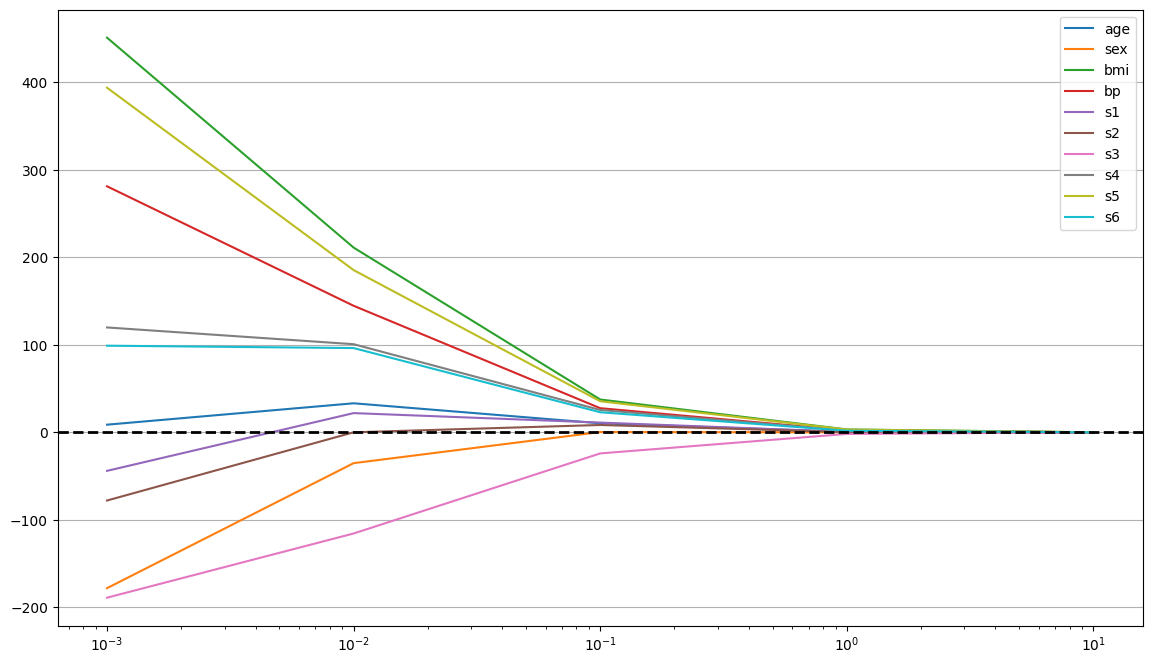

In [183]:
plt.figure(figsize=(14,8))
plt.semilogx(ela_df)
plt.axhline(y=0, linestyle = '--', linewidth = 2, color = 'black')
plt.legend(labels = ela_df.columns, bbox_to_anchor = (1,1))
plt.grid(axis = 'y')
plt.show()

In [184]:
# 엘라스틱넷의 alpha에 따라서 실제 모델의 성능을 확인
ela1 = ElasticNet(alpha = 0.01)
ela2 = ElasticNet(alpha=0.1)
ela3 = ElasticNet(alpha=1)

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.values, diabetes['target'], test_size=0.2, random_state=42
)

In [186]:
ela1.fit(X_train, Y_train)
ela2.fit(X_train, Y_train)
ela3.fit(X_train, Y_train)

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [187]:
pred_ela1 = ela1.predict(X_test)
pred_ela2 = ela2.predict(X_test)
pred_ela3 = ela3.predict(X_test)

In [188]:
mse_ela1 = mean_squared_error(pred_ela1, Y_test)
mse_ela2 = mean_squared_error(pred_ela2, Y_test)
mse_ela3 = mean_squared_error(pred_ela3, Y_test)

In [190]:
print(round(mse_ela1, 4))
print(round(mse_ela2, 4))
print(round(mse_ela3, 4))

3318.5057
4775.4668
5311.2128


- 연습
    - sklearn 라이브러리 안에 있는 datasets 중에 fetch_california_housing 함수을 로드
    - 해당 함수를 이용하여 샘플 데이터를 변수에 저장
    - 샘플 데이터에서 독립변수과 종속변수를 각각 X, Y에 대입하여 저장
    - train, test 의 비율은 7 : 3의 비율로 데이터를 분할
    - 단순 선형 회귀, 엘라스틱넷을 이용하여 모델의 성능을 검증
        - alpha : 0.01, 0.1, 1
        - l1_ratio : 0, 0.5, 1
    - 평가 지표는 mse를 이용
    - 가장 성능이 좋은 모델을 확인

In [198]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split

In [193]:
cali = fetch_california_housing()

In [195]:
X = cali['data']
Y = cali['target']

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 42
)

In [201]:
# 단순선형회귀
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

In [203]:
mse_lr = mean_squared_error(pred_lr, Y_test)
mse_lr

0.5305677824766758

In [211]:
alpha = np.logspace(-2, 0, 3)

In [220]:
# 릿지
pred_ridge = []
mse_ridge = []
for a in alpha:
    ridge = ElasticNet(l1_ratio = 0, alpha = a)
    ridge.fit(X_train, Y_train)
    pred = ridge.predict(X_test)
    pred_ridge.append(pred)
    mse = mean_squared_error(pred, Y_test)
    mse_ridge.append(mse)

print(mse_ridge)

[0.5257570765857412, 0.5340053198927782, 0.6227709000786195]


/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.853e+03, tolerance: 1.936e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.208e+03, tolerance: 1.936e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers 

In [222]:
# 엘라스틱넷
pred_ela = []
mse_ela = []
for a in alpha:
    ela = ElasticNet(l1_ratio = 0.5, alpha = a)
    ela.fit(X_train, Y_train)
    pred = ela.predict(X_test)
    pred_ela.append(pred)
    mse = mean_squared_error(pred, Y_test)
    mse_ela.append(mse)
print(pred_ela)
print(mse_ela)

[array([0.75287314, 1.7529878 , 2.60994208, ..., 2.00644235, 1.58952328,
       1.76599397], shape=(6192,)), array([0.94286685, 1.66624798, 2.3793504 , ..., 1.88499526, 1.66082205,
       1.67392993], shape=(6192,)), array([1.47008415, 1.74478766, 2.23364298, ..., 1.86954928, 1.84565118,
       1.75495532], shape=(6192,))]
[0.5251543054669673, 0.5571449056777037, 0.7562926012142385]


In [240]:
# 라쏘
pred_lasso = []
mse_lasso = []
for a in alpha:
    lasso = ElasticNet(l1_ratio = 1, alpha = a)
    lasso.fit(X_train, Y_train)
    pred = lasso.predict(X_test)
    pred_lasso.append(pred)
    mse = mean_squared_error(pred, Y_test)
    mse_lasso.append(mse)
print(pred_lasso)
print(mse_lasso)

[array([0.76341584, 1.74742407, 2.5680822 , ..., 1.97824741, 1.59611307,
       1.74039592], shape=(6192,)), array([1.04838406, 1.61486944, 2.31221044, ..., 1.86400615, 1.70421747,
       1.66007708], shape=(6192,)), array([1.724849  , 1.87883455, 2.1510216 , ..., 1.92051839, 1.89993699,
       1.86377391], shape=(6192,))]
[0.5253119582240043, 0.5970512258509185, 0.9345280531749285]


In [241]:
for i in range(3):
    print(f"mse, ridge, alpha {alpha[i]}: ", round(mse_ridge[i],4))

for i in range(3):
    print(f"mse, ela, alpha {alpha[i]}: ", round(mse_ela[i], 4))

for i in range(3):
    print(f"mse, lasso, alpha {alpha[i]}: ", round(mse_lasso[i], 4))
mse
print("mse, linear regression,", round(mse_lr, 4))

mse, ridge, alpha 0.01:  0.5258
mse, ridge, alpha 0.1:  0.534
mse, ridge, alpha 1.0:  0.6228
mse, ela, alpha 0.01:  0.5252
mse, ela, alpha 0.1:  0.5571
mse, ela, alpha 1.0:  0.7563
mse, lasso, alpha 0.01:  0.5253
mse, lasso, alpha 0.1:  0.5971
mse, lasso, alpha 1.0:  0.9345
mse, linear regression, 0.5306


In [250]:
mse_df = pd.DataFrame(
    data = [mse_ridge, mse_ela, mse_lasso], 
    index = ['alpha=0.01', 'alpha=0.1', 'alpha =1'], 
    columns = ['ridge', 'ela', 'lasso'])
mse_df

,ridge,ela,lasso
alpha=0.01,0.525757,0.534005,0.622771
alpha=0.1,0.525154,0.557145,0.756293
alpha =1,0.525312,0.597051,0.934528


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet

In [3]:
# 샘플 데이터 로드
data = fetch_california_housing()

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [5]:
# 독립변수
X = data['data']
Y = data['target']

In [6]:
# cali 데이터프레임에서 price를 예측한다면
cali = pd.DataFrame(data['data'], columns = data['feature_names'])
cali['price'] = data['target']
cali

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
X = cali.drop('price', axis = 1).values
Y = cali['price'].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [17]:
# 단순선형회귀 모델 생성
lr = LinearRegression()
# train 데이터를 이용해서 학습
lr.fit(X_train, Y_train)
# X_test를 이용하여 데이터를 예측 -> 집값 예측가격을 출력
pred_lr = lr.predict(X_test)
# 실제 가격 : Y_test, 예측가격: pred_lr
# MSE -> Y_test와 pred_lr의 차이에서 제곱을 한 뒤 평균
mse_lr = mean_squared_error(Y_test, pred_lr)
r2_lr = r2_score(Y_test, pred_lr)

In [15]:
diff = (Y_test - pred_lr)
squared = diff * diff 
squared.sum() / len(squared)
mse_lr

0.5558915986952423

In [28]:
# 9개의 ElasticNet 모델을 생성
alpha = [0.01, 0.1, 1]
ratio = [0, 1, 0.5]
model_names = ['Ridge', 'Lasso', 'ElasticNet']

# 반복문에서 나온 결과를 저장할 수 있는 빈 딕셔너리 생성
model_result = dict()

# 위의 3개의 리스트를 이용하여 반복문 생성
for r, name in zip(ratio, model_names):
    # r -> ratio의 각각의 항목 -> L1 패널티 비중
    # name -> model_names의 각각의 항목 -> L1 패널티 비중에 따른 모델의 이름

    # 규제의 강도인 alpha를 이용해서 반복문 생성
    for a in alpha:
        # a -> alpha의 각각의 항목 -> 규제의 강도
        ela = ElasticNet(alpha = a, l1_ratio = r)
        # 모델에 학습
        ela.fit(X_train, Y_train)
        # 예측값 생성
        pred_ela = ela.predict(X_test)
        # 평가지표 생성
        mse_ela = mean_squared_error(Y_test, pred_ela)
        r2_ela = r2_score(Y_test, pred_ela)
        # 반복 실행을 할때마다 딕셔너리에 mse,r2를 추가
        model_result[f"{name}_{a}"] = [round(mse_ela, 3), round(r2_ela, 3)]

/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.360e+03, tolerance: 2.207e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.765e+03, tolerance: 2.207e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers 

In [29]:
list(zip(ratio, model_names))

[(0, 'Ridge'), (1, 'Lasso'), (0.5, 'ElasticNet')]

In [31]:
# 단순 선형 회귀 데이터 추가
model_result['Linear'] = [round(mse_lr, 3), round(r2_lr, 3)]

In [32]:
model_result

{'Ridge_0.01': [0.547, 0.582],
 'Ridge_0.1': [0.551, 0.58],
 'Ridge_1': [0.635, 0.515],
 'Lasso_0.01': [0.544, 0.585],
 'Lasso_0.1': [0.614, 0.532],
 'Lasso_1': [0.938, 0.284],
 'ElasticNet_0.01': [0.546, 0.584],
 'ElasticNet_0.1': [0.573, 0.563],
 'ElasticNet_1': [0.765, 0.417],
 'Linear': [0.556, 0.576]}

In [40]:
models = pd.DataFrame(model_result, index = ['MSE', 'R2_score']).T
models

,MSE,R2_score
Ridge_0.01,0.547,0.582
Ridge_0.1,0.551,0.580
Ridge_1,0.635,0.515
Lasso_0.01,0.544,0.585
Lasso_0.1,0.614,0.532
Lasso_1,0.938,0.284
ElasticNet_0.01,0.546,0.584
ElasticNet_0.1,0.573,0.563
ElasticNet_1,0.765,0.417
Linear,0.556,0.576


In [42]:
models.sort_values('R2_score', ascending = False)

,MSE,R2_score
Lasso_0.01,0.544,0.585
ElasticNet_0.01,0.546,0.584
Ridge_0.01,0.547,0.582
Ridge_0.1,0.551,0.580
Linear,0.556,0.576
ElasticNet_0.1,0.573,0.563
Lasso_0.1,0.614,0.532
Ridge_1,0.635,0.515
ElasticNet_1,0.765,0.417
Lasso_1,0.938,0.284
